In [58]:
import os
import difflib
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [6]:
district_dict = pd.read_csv('../data/average_metrics.csv')
district_dict = district_dict[['distrito', 'tipo']].set_index('distrito')['tipo'].to_dict()

<Axes: >

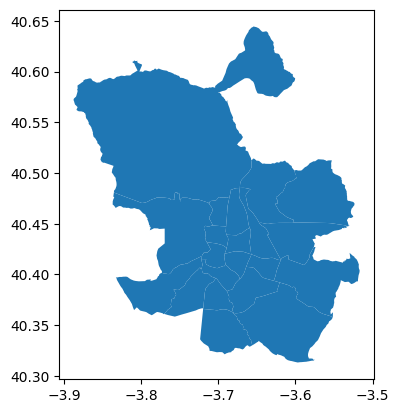

In [12]:
# Load polygons from Madrid center

polygons_center = gpd.read_file('../data/madrid-districts.geojson')
polygons_center = polygons_center[['name', 'geometry']]
polygons_center.plot()

In [13]:
municipios = gpd.read_file('../data/Municipios_-3498985394491007638.geojson')
municipios.head()

,OBJECTID,INSPIREID,NATCODE,NAMEUNIT,CODNUT1,CODNUT2,CODNUT3,CODIGOINE,geometry
0,1,ES.IGN.SIGLIM34081616266,34081616266,Villarejo-Periesteban,ES4,ES42,ES423,16266,"POLYGON ((-2.47791 39.88027, -2.47793 39.88074..."
1,2,ES.IGN.SIGLIM34081616269,34081616269,Villares del Saz,ES4,ES42,ES423,16269,"POLYGON ((-2.58669 39.85793, -2.58601 39.85842..."
2,3,ES.IGN.SIGLIM34081616270,34081616270,Villarrubio,ES4,ES42,ES423,16270,"POLYGON ((-2.96423 39.95773, -2.96231 39.95816..."
3,4,ES.IGN.SIGLIM34081616271,34081616271,Villarta,ES4,ES42,ES423,16271,"POLYGON ((-1.68041 39.46783, -1.67391 39.46654..."
4,5,ES.IGN.SIGLIM34081616272,34081616272,Villas de la Ventosa,ES4,ES42,ES423,16272,"POLYGON ((-2.49911 40.26601, -2.49878 40.26597..."


In [14]:
# Search for Madrid code
municipios[municipios['NAMEUNIT'] == 'Madrid']

,OBJECTID,INSPIREID,NATCODE,NAMEUNIT,CODNUT1,CODNUT2,CODNUT3,CODIGOINE,geometry
472,473,ES.IGN.SIGLIM34132828079,34132828079,Madrid,ES3,ES30,ES300,28079,"POLYGON ((-3.88558 40.57446, -3.88522 40.57522..."


In [33]:
# Filter out polygons from madrid

madrid = municipios[municipios['CODNUT3'] == 'ES300']
madrid = madrid[['NAMEUNIT', 'geometry']].copy()
madrid.rename(columns={'NAMEUNIT': 'name'}, inplace=True)

polygons = pd.concat([madrid, polygons_center]).set_index('name')
polygons.index

Index(['La Acebeda', 'Ajalvir', 'Alameda del Valle', 'El Álamo',
       'Alcalá de Henares', 'Alcobendas', 'Alcorcón', 'Aldea del Fresno',
       'Algete', 'Alpedrete',
       ...
       'Usera', 'Puente de Vallecas', 'Moratalaz', 'Ciudad Lineal',
       'Hortaleza', 'Villaverde', 'Villa de Vallecas', 'Vicalvaro', 'San Blas',
       'Barajas'],
      dtype='object', name='name', length=202)

In [46]:
def find_most_similar(target, candidates):
    best_match = difflib.get_close_matches(target, candidates, n=1, cutoff=0.0)
    if best_match:
        return best_match[0]
    else:
        return None  # No similar string found


districts = list(district_dict.keys())

chosen_districts = []
for d in districts:
    sim = find_most_similar(d, polygons.index)
    chosen_districts.append(sim)

<Axes: >

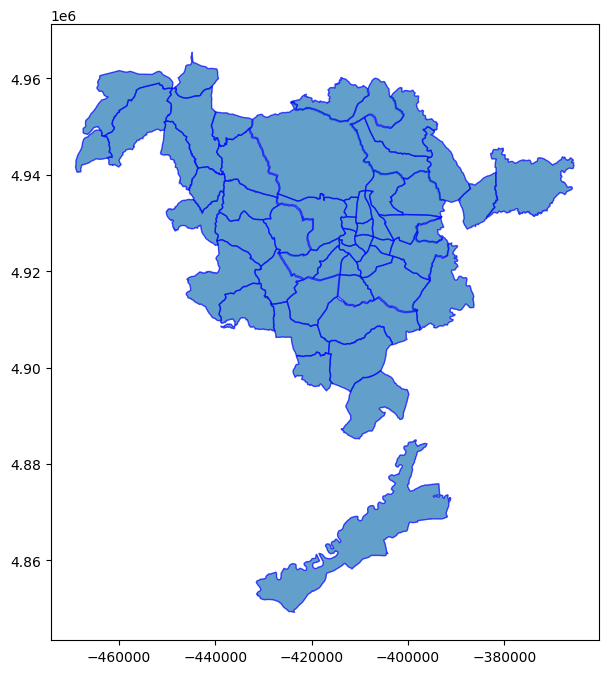

In [62]:
df = polygons[polygons.index.isin(chosen_districts)]
df = df.to_crs(epsg=3857)

fib, ax = plt.subplots(figsize=(10, 8))
df.plot(ax=ax, edgecolor='blue', alpha=0.7)

In [63]:
import folium